# Game success Insights

## 1.1 Initialization

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math 
import matplotlib.pyplot as plt

# Load data

games = pd.read_csv("../games.csv")

## 1.2 General information

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can see that there are missing values in columns such as Name, Year_of_Release, Genre, Critic_Score, User_Score, and Rating. The columns name are capitalized. Additionally, some columns have incorrect datatypes, possibly because they contain values that shouldn't be there. All of this indicates that we need to preprocess the data before conducting the analysis.

## 2.- Preproccessing data

### 2.1 Columns name

In [3]:
# Convert columns name to lowercase
games.columns = games.columns.str.lower()

### 2.2 Duplicates

In [4]:
print('Number of duplicates: ', games.duplicated().sum()) 

Number of duplicates:  0


We don´t have rows totally duplicated.

### 2.3 NaN values

In [5]:
print(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [6]:
# Show the rows with missing values in the column "name"
print(games[games['name'].isnull()])
# Delete the rows with missing values
games.dropna(subset=['name'], inplace=True)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


The two rows with null values for 'name' and 'genre' will be deleted because they are not informative for our analysis and cannot be grouped.

#### 2.3.1 'year_of_release' column

In [7]:
release_na = games[games['year_of_release'].isnull()]
index_na = games[games['year_of_release'].isnull()].index

min = int(games['year_of_release'].min())
max = int(games['year_of_release'].max())

#Extract the year from the 'name' column and fill the 'year_of_relesase' column
games['year_of_release'] = games['year_of_release'].fillna(games['name'].str.extract(r'(\d{' + str(len(str(min))) + '})', expand=False))

print("Null values: ", games['year_of_release'].isnull().sum())

games.dropna(subset=['year_of_release'], inplace=True)

print("Null values: ", games['year_of_release'].isnull().sum())

Null values:  252
Null values:  0


After trying to fill the 'year_of_release' column with the information from the 'name' column, 252 null values remain. These values represent less than 1.5% of our dataset, so they will be removed as they cannot be grouped without affecting the analysis.

### 2.3.2 'critic_score' column

                          name platform year_of_release      genre  na_sales  \
0                   Wii Sports      Wii          2006.0     Sports     41.36   
2               Mario Kart Wii      Wii          2008.0     Racing     15.68   
3            Wii Sports Resort      Wii          2009.0     Sports     15.61   
6        New Super Mario Bros.       DS          2006.0   Platform     11.28   
7                     Wii Play      Wii          2006.0       Misc     13.96   
...                        ...      ...             ...        ...       ...   
16696                   Breach       PC          2011.0    Shooter      0.01   
16697         Bust-A-Move 3000       GC          2003.0     Puzzle      0.01   
16698         Mega Brain Boost       DS          2008.0     Puzzle      0.01   
16702  STORM: Frontline Nation       PC          2011.0   Strategy      0.00   
16705                  15 Days       PC          2009.0  Adventure      0.00   

       eu_sales  jp_sales  other_sales 

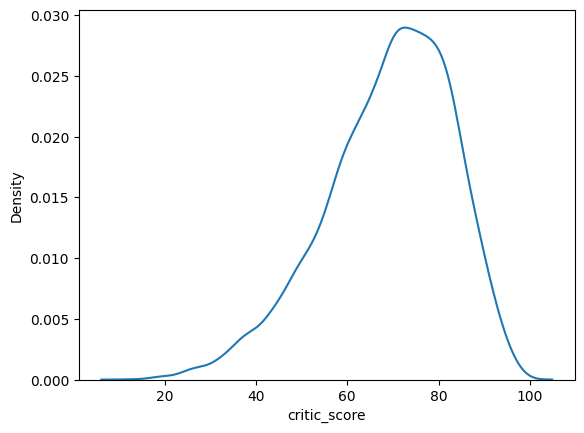

In [8]:
cs = games[(games['critic_score'].notnull())]
print(cs)
sns.kdeplot(data=cs, x='critic_score')
plt.show()

Given that the distribution is approximately normal and slightly skewed, the missing values will be filled with the median.

In [9]:
median_cs = cs['critic_score'].median()
print(median_cs)
games['critic_score'].fillna(median_cs, inplace=True)

71.0


C:\Users\jagv1\AppData\Local\Temp\ipykernel_30100\1175581608.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['critic_score'].fillna(median_cs, inplace=True)


### 2.3.3 'user_score' column

C:\Users\jagv1\AppData\Local\Temp\ipykernel_30100\3799084479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['user_score'] = us['user_score'].astype(float)


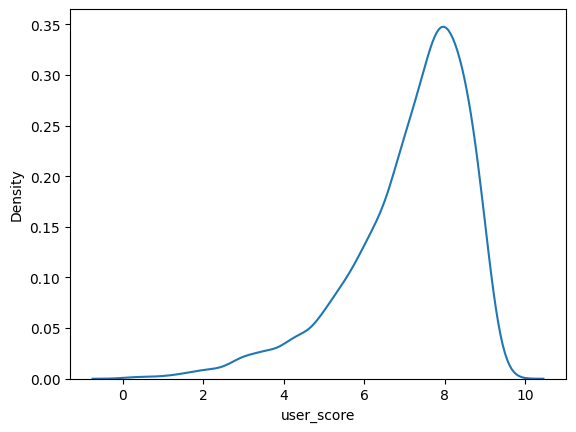

In [10]:
# Filter data for valid user scores (exclude 'tbd' and null values)
us = games[(games['user_score'] != 'tbd') & (games['user_score'].notnull())]

# Convert user scores to float for numerical calculations
us['user_score'] = us['user_score'].astype(float)

# Create a KDE plot to visualize user score distribution
sns.kdeplot(data=us, x='user_score')
plt.show()

In this case, the distribution is also approximately normal and slightly skewed. Additionally, 'tbd' appears to be a randomly missing value, so, as in the previous case, the missing values will be filled with the median.

In [11]:
median_us = us['user_score'].median()
print(median_us)
games['user_score'].fillna(median_us, inplace=True)
games['user_score'] = games['user_score'].replace('tbd', median_us)

7.5


C:\Users\jagv1\AppData\Local\Temp\ipykernel_30100\275398944.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['user_score'].fillna(median_us, inplace=True)


### 2.3.4 'rating' column

In [12]:
games['rating'].fillna('tbd', inplace=True)

C:\Users\jagv1\AppData\Local\Temp\ipykernel_30100\3739939213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['rating'].fillna('tbd', inplace=True)


### 2.4 Data types

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  object 
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  object 
 10  rating           16461 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [14]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)

games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int32  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  float64
 10  rating           16461 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### 2.5 Total sales

In this section, the total sales will be determined.

In [15]:
# Calculate the total sales per game
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## 3.- Analysis

### 3.1.- Games per year

First, we analyze the games released per year.

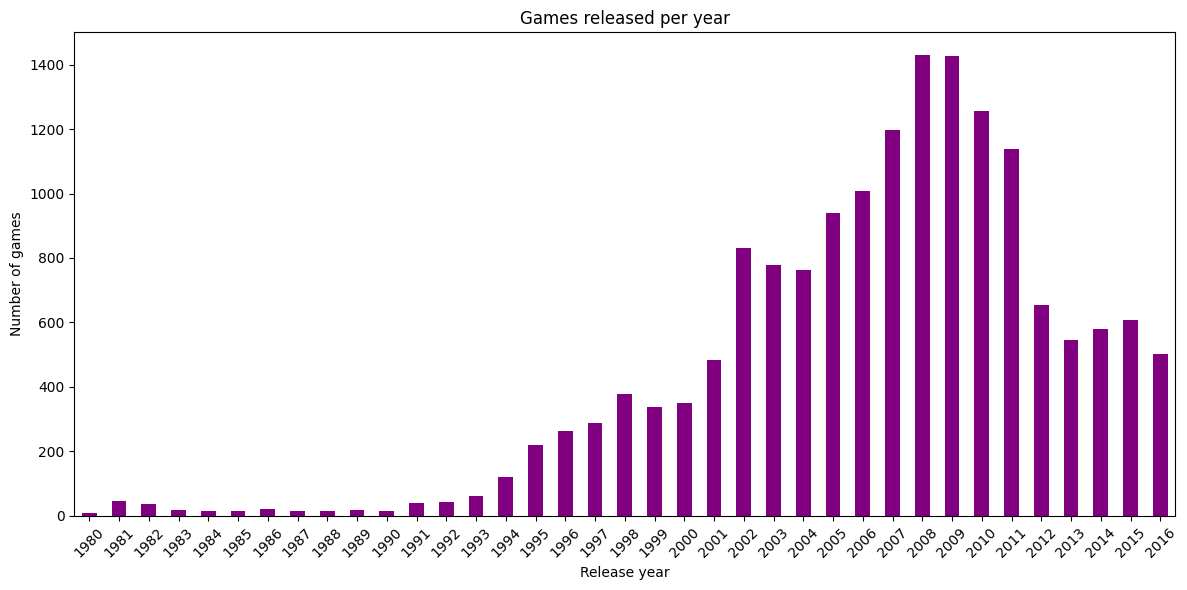

In [16]:
games_by_year = games.groupby('year_of_release').size()

# Games per year graphic
plt.figure(figsize=(12, 6))
games_by_year.plot(kind='bar', color='purple',
                   title = 'Games released per year', 
                   xlabel ='Release year',
                   ylabel = 'Number of games',
                   rot= 45)
plt.tight_layout()
plt.show()

The graph shows the number of games released per year from 1980 to 2016.
There is a increase in the number of games released starting in the 1991, peaking around 2007 and 2009. This growth likely reflects the expansion of the gaming industry and advancements in technology.
The highest number of games was released between 2006 and 2009, after this peak the number of games begin to decline. This might be due to important changes in the industry, such as the rise of mobile gaming or changes in how games are developed and distributed.

### 3.2 Platforms

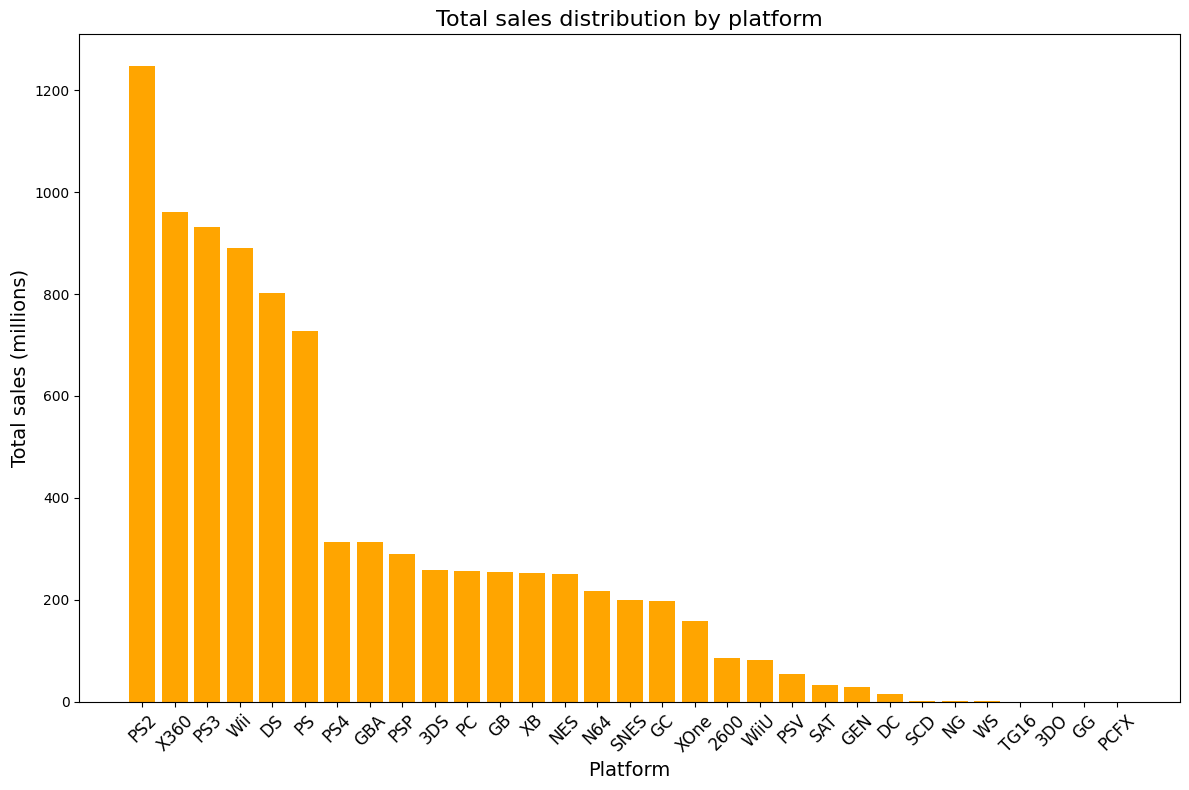

   platform  total_sales
16      PS2      1247.28
28     X360       961.30
17      PS3       931.34
26      Wii       891.18
4        DS       802.79
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       290.34
2       3DS       257.81
13       PC       256.11
5        GB       254.43
29       XB       252.66
11      NES       251.05
10      N64       218.01
23     SNES       200.04
7        GC       197.03
30     XOne       159.32
0      2600        86.48
27     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


In [17]:

# Group total sales by plastform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort the platforms by total sales
platform_sales = platform_sales.sort_values('total_sales', ascending=False)

# Create a histogram for total sales by platform
plt.figure(figsize=(12, 8))
plt.bar(platform_sales['platform'], platform_sales['total_sales'], color='orange')

# Customize the graph
plt.title('Total sales distribution by platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales (millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the graph
plt.show()
print(platform_sales)



During the period covered by our data (1980-2016), the consoles that generated the most sales were the PS2, Xbox 360, and PS3.

<Figure size 1200x800 with 0 Axes>

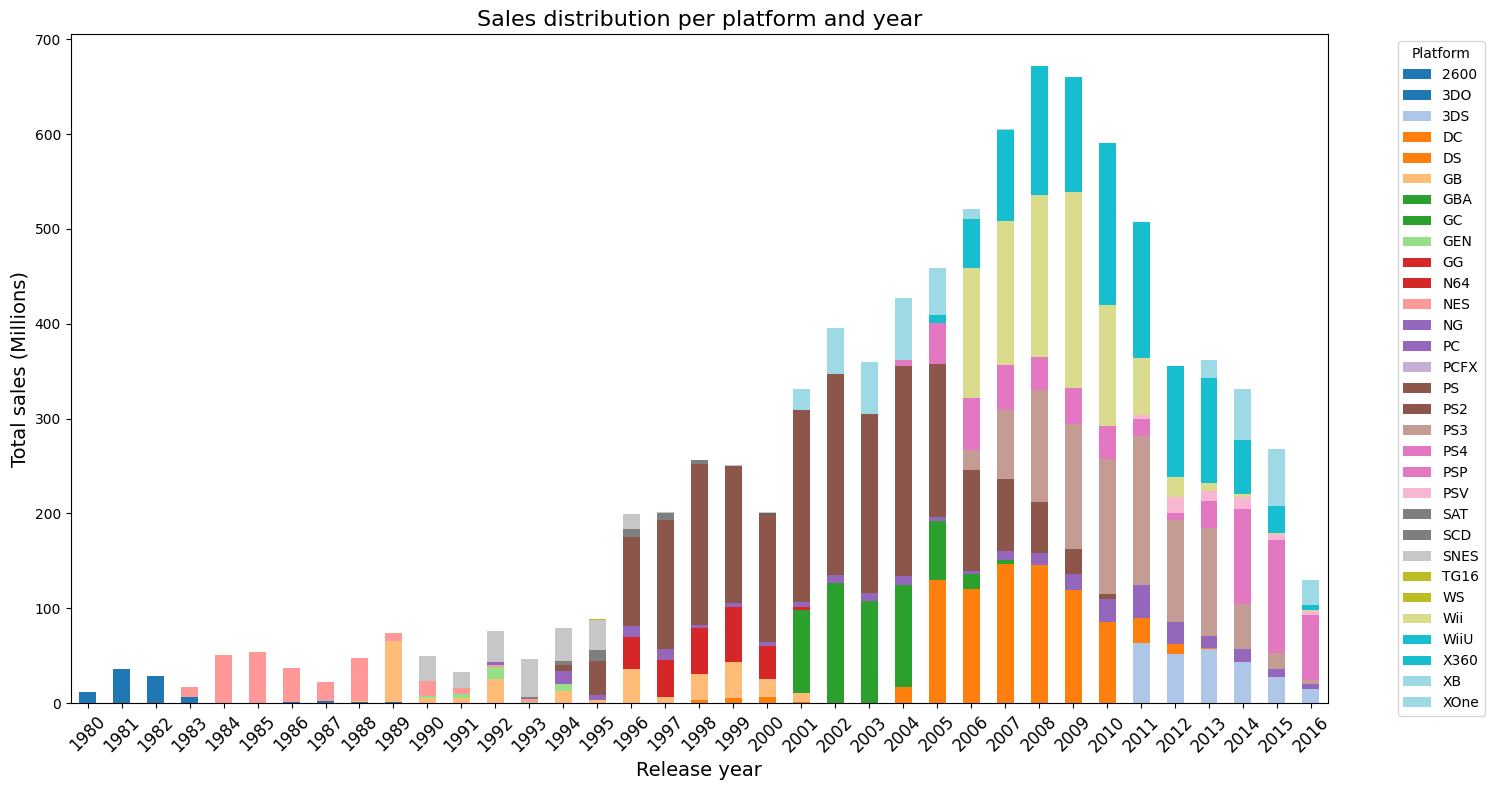

In [18]:
# Group total sales by year and platform
platform_year_sales = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Create a pivot
platform_year_pivot = platform_year_sales.pivot(index='year_of_release', columns='platform', values='total_sales')

# Save the data in CSV file
#platform_year_pivot.to_csv('ventas_totales_por_plataforma_y_año.csv')
#print("Archivo 'ventas_totales_por_plataforma_y_año.csv' generado con éxito.")

# Stacked plot
plt.figure(figsize=(12, 8))
platform_year_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')

# 
plt.title('Sales distribution per platform and year', fontsize=16)
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Total sales (Millions)', fontsize=14)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

plt.show()



This plot illustrates the evolution of video game sales across different platforms from 1980 to 2016.
The total sales have seen a significant increase over the years with a peak in the mid-2000s, this suggests a growing market and increasing popularity of video games.
Each platform shows a distinct lifecycle, with sales rising initially, peaking, and then declining as newer platforms are introduced.

### 3.3.- Active platforms

In [19]:
# Filter rows with sales greater than zero
games_nonzero = games[games['total_sales'] > 0]

# Number of only years where sales for each platform are greater than zero.
platform_years_count = games_nonzero.groupby('platform')['year_of_release'].nunique()

# Calculate average active years
average_active_years = platform_years_count.sum() / platform_years_count.count()

# Show results
print("Active years by platform:")
print(platform_years_count)
print(f"\nAverage active years: {average_active_years:.2f} años")


Active years by platform:
platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

Average active years: 7.68 años


We can see that the average lifespan of each platform is 7.68 years. An analysis of this data reveals that platforms launched before the year 2000 tended to have a lifespan between 6 and 10 years, while those launched after 2000 showed a slightly longer lifespan, between 7 and 11 years. This phenomenon can be attributed to the exponential growth of the video game industry. It is noteworthy that, in both periods, platforms with higher sales managed to extend their lifespan beyond 12 years.

### 3.4.- Top platforms

We will only consider data from the year 2010 and beyond for this analysis.

In [20]:
# Filter the data after 2010
sales_from_2010 = games[games['year_of_release'] >= 2010]

# Group the data by platform and calculate the total sales
sales_2010 = sales_from_2010.groupby('platform')['total_sales'].sum().reset_index()

# Sort the platforms by total sales
sales_2010 = sales_2010.sort_values('total_sales', ascending=False)

print(sales_2010)

   platform  total_sales
4       PS3       587.74
10     X360       550.46
5       PS4       314.14
0       3DS       257.81
8       Wii       222.97
11     XOne       159.32
1        DS       123.75
2        PC       122.31
9      WiiU        82.19
6       PSP        64.05
7       PSV        53.81
3       PS2         6.09


Since 2010, PS3, X360, and PS4 have been the sales leaders. While it is observed that PS3 and X360 sales have declined in recent years, PS4 sales have started to grow. Considering the typical lifespan of platforms, PS4 and XOne are considered potentially profitable as they may be in the early years of their lifecycle, allowing for significant growth. PC is also considered a potentially profitable platform due to its long-standing presence, suggesting that this industry is constantly evolving and its lifecycle is not finite. Although PC sales may not be the highest in recent years, it could indicate greater long-term growth. 3DS and Wii are discarded as potential options due to their significant sales at the beginning of the decade, which have declined dramatically in the last 3-4 years, suggesting that the end of their lifecycle is near.

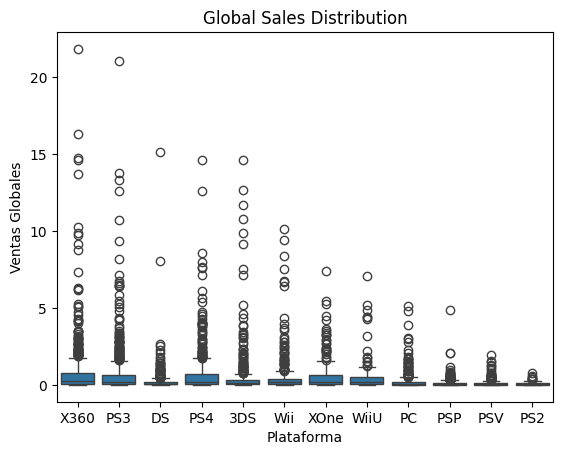

In [21]:
# Create a boxplot
sns.boxplot(x='platform', y='total_sales', data=sales_from_2010,)
plt.title('Global Sales Distribution')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.show()

### 3.5.-Correlation between reviews and sales

In this section, we will focus on the PS4 to analyze the correlation between user and critic ratings.

In [22]:
# Filter the PS4 info
PS4_sales = games[games['platform'] == 'PS4']['total_sales']
PS4_US = games[games['platform'] == 'PS4']['user_score']
PS4_CS = games[games['platform'] == 'PS4']['critic_score']

# Calculate the covariance matrix
covariance_matrix_user = np.cov(PS4_US,PS4_sales)
covariance_matrix_critic = np.cov(PS4_CS,PS4_sales)

# Extract the covariance
covariance_user = covariance_matrix_user[0][1]
covariance_critic = covariance_matrix_critic[0][1]

# Calculate the standard deviation
std_sales = np.std(PS4_sales)
std_user = np.std(PS4_US)
std_critic = np.std(PS4_CS)

# Calculate the correlation between the user score and PS4 sales
correlation_us = covariance_user / (std_sales*std_user)

# Calculate the correlation between the critic score and PS4 sales
correlation_cs = covariance_critic / (std_sales*std_critic)

# Show the correlation
print(correlation_us)
print(correlation_cs)

-0.06291607911465104
0.3395727099155128


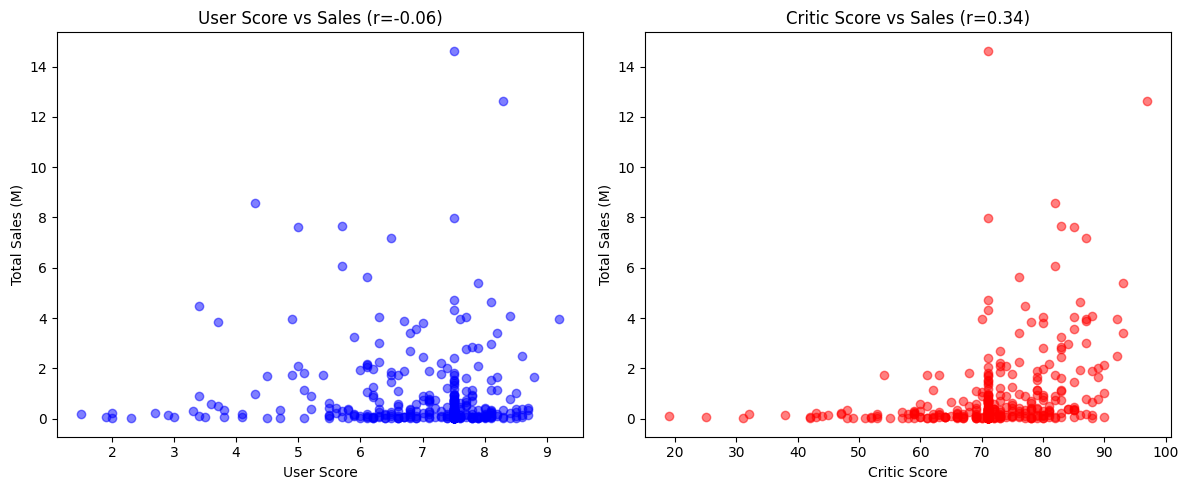

In [23]:
# Create a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# User Score vs Sales
ax1.scatter(PS4_US, PS4_sales, alpha=0.5, color='blue')
ax1.set_title(f'User Score vs Sales (r={correlation_us:.2f})')
ax1.set_xlabel('User Score')
ax1.set_ylabel('Total Sales (M)')

# Critic Score vs Sales
ax2.scatter(PS4_CS, PS4_sales, alpha=0.5, color='red')
ax2.set_title(f'Critic Score vs Sales (r={correlation_cs:.2f})')
ax2.set_xlabel('Critic Score')
ax2.set_ylabel('Total Sales (M)')

plt.tight_layout()
plt.show()

Based on the correlation values and dispersion plots, user reviews have a weak negative correlation, and we observe no clear relationship between user scores and sales.
Critic reviews have a little positive correlation and games with higher critic scores tend to have better sales
The analysis suggests critic reviews have more influence on PS4 sales than user reviews, but the relationship isn´t strong enough to be a reliable sales predictor.

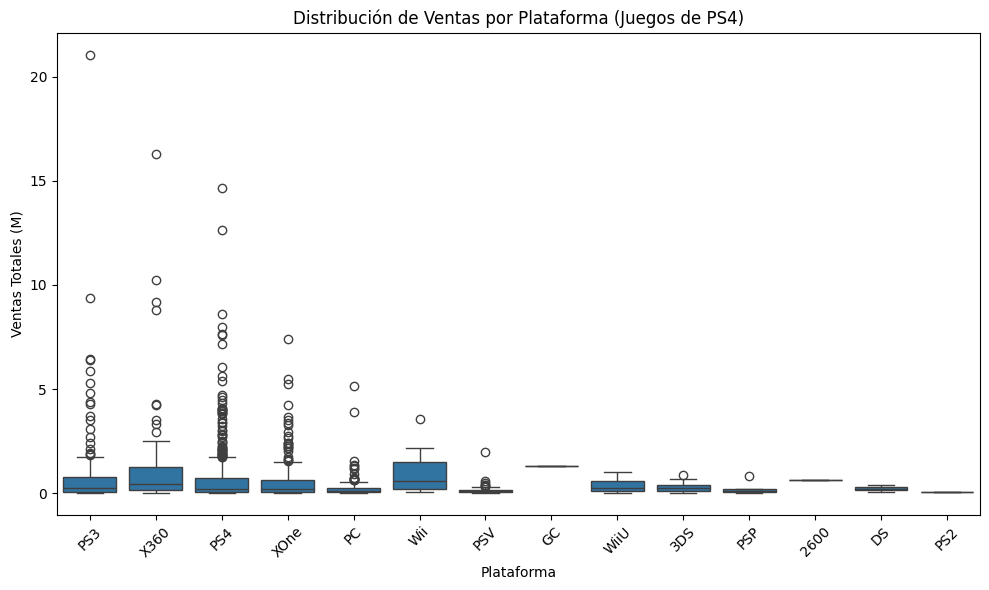


Stats by platform:
          mean  median  count
platform                     
2600      0.62    0.62      1
3DS       0.29    0.23     19
DS        0.22    0.22      2
GC        1.30    1.30      1
PC        0.29    0.12    118
PS2       0.06    0.06      1
PS3       0.85    0.26    178
PS4       0.80    0.20    392
PSP       0.24    0.11      5
PSV       0.14    0.09     82
Wii       1.02    0.56     11
WiiU      0.34    0.24     37
X360      1.13    0.43    113
XOne      0.60    0.21    217


In [24]:
# Filter the PS4 games
ps4_games = games[games['platform'] == 'PS4']['name'].unique()

# Get the PS4 games in other platforms
multi_platform = games[games['name'].isin(ps4_games)]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=multi_platform)
plt.title('Distribución de Ventas por Plataforma (Juegos de PS4)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (M)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate stats
stats = multi_platform.groupby('platform')['total_sales'].agg(['mean', 'median', 'count']).round(2)
print("\nStats by platform:")
print(stats)

The chosen consoles,(PS4, XOne, and Pc) have similar sales median. Older platforms have lower sales for the same games. The outliers should represent the multiplatform hits.

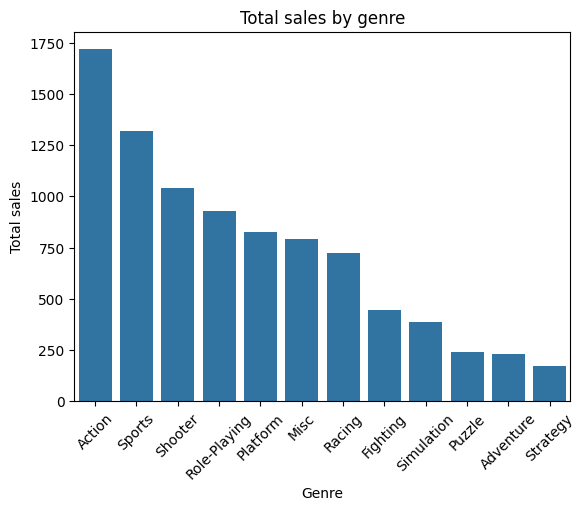

In [25]:
# Group by genre and calculate total sales
sales_by_genre = games.groupby('genre')['total_sales'].sum()

# Sort the values
sales_by_genre = sales_by_genre.sort_values(ascending=False)

# Create a bar plot
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('Total sales by genre')
plt.xticks(rotation=45)
plt.show()

The graphics shows a clear preference for action and sports games, as well as for shooters and RPGs. In contrast, puzzle, adventure, and strategy games are the least prefered by the gaming community.

## 4.- Analysis by region

### 4.1.North America analysis

platform
X360    595.74
PS2     580.30
Wii     486.87
PS3     390.13
DS      380.32
Name: na_sales, dtype: float64
genre
Action      863.23
Sports      677.65
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


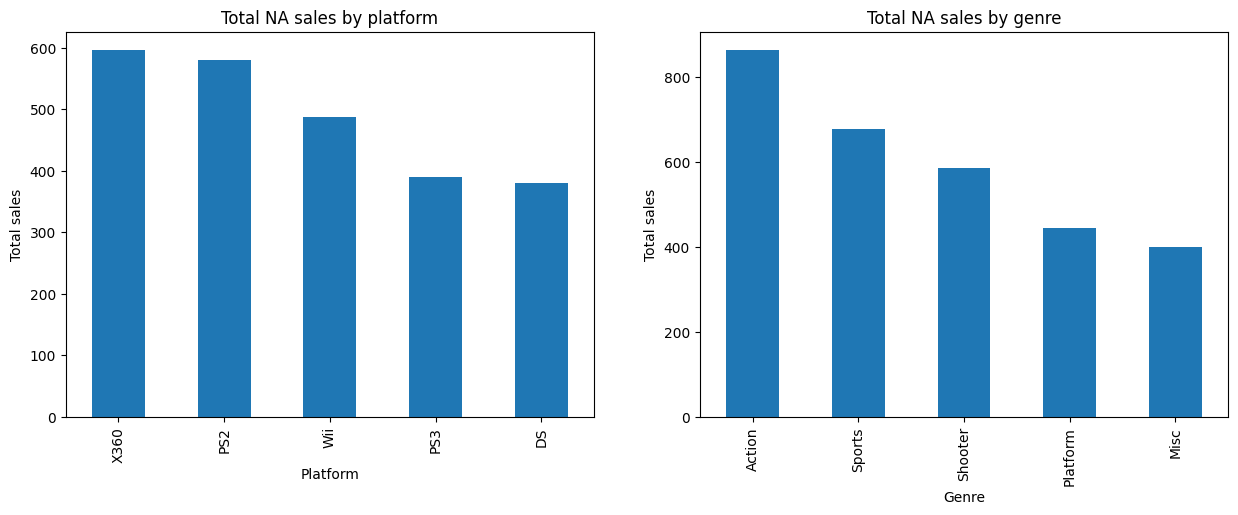

In [26]:
# Sum na_sales by platform
na_platforms = games.groupby('platform')['na_sales'].sum()
na_platforms = na_platforms.sort_values(ascending=False)
print(na_platforms.head(5))

# Sum na_sales by genre
na_genres = games.groupby('genre')['na_sales'].sum()
na_genres = na_genres.sort_values(ascending=False)
print(na_genres.head(5))

# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for total NA sales by platform
na_platforms.head(5).plot(kind='bar', ax=axes[0], title='Total NA sales by platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total sales')

# Plot for total NA sales by genre
na_genres.head(5).plot(kind='bar', ax=axes[1], title='Total NA sales by genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Total sales')

plt.show()


The NA platform sales graph exhibits a strong correlation with the overall platform sales graph. Both graphs feature the top 5 best-selling platforms, with a different order. Similarly, the genre graph aligns closely with the global genre trends, with the top three genres remaining consistent. However, some minor variations can be observed in the lower-ranking genres.

### 4.2.- Europe analysis

platform
PS2     337.00
PS3     327.21
X360    268.37
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
genre
Action     511.24
Sports     374.71
Shooter    314.52
Racing     234.99
Misc       210.60
Name: eu_sales, dtype: float64


Text(0, 0.5, 'Total sales')

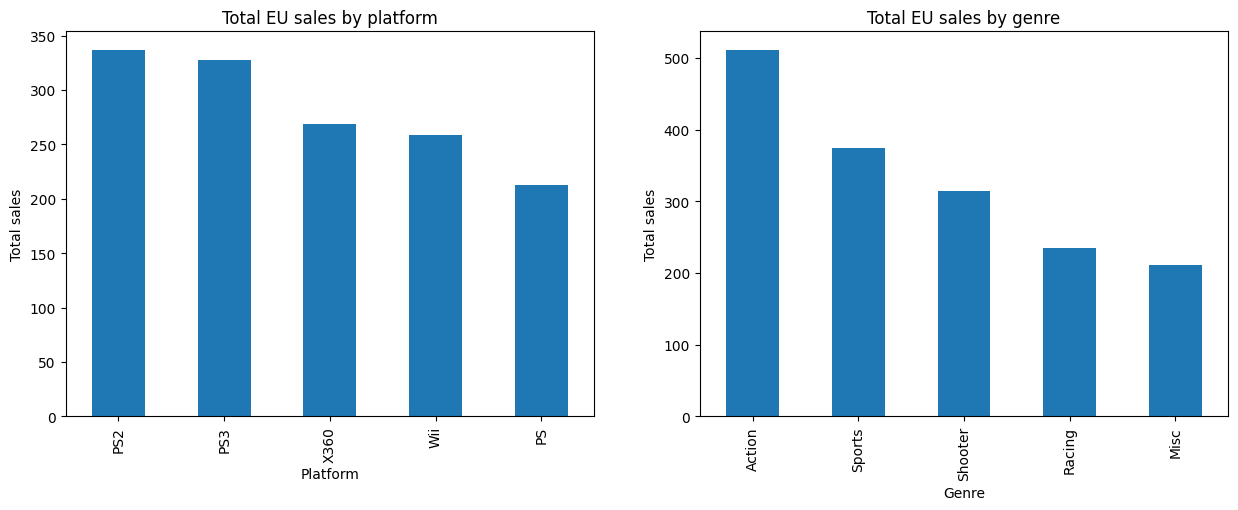

In [27]:
# Sum eu_sales by platform
eu_platforms = games.groupby('platform')['eu_sales'].sum()
eu_platforms = eu_platforms.sort_values(ascending=False)
print(eu_platforms.head(5))

# Sum eu_sales by genre
eu_genres = games.groupby('genre')['eu_sales'].sum()
eu_genres = eu_genres.sort_values(ascending=False)
print(eu_genres.head(5))

# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for total EU sales by platform
eu_platforms.head(5).plot(kind='bar', ax=axes[0], title='Total EU sales by platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total sales')

# Plot for total EU sales by genre
eu_genres.head(5).plot(kind='bar', ax=axes[1], title='Total EU sales by genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Total sales')

The EU platform sales also shows a strong correlation with the global trends but in this case we have a diferent top platform. Similarly, the genre graph aligns closely with the global genre trends, with the top three genres remaining consistent. However, some minor variations can be observed in the lower-ranking genres likewise in NA.

### 4.3.- Japan analysis

platform
DS      175.02
PS      139.78
PS2     137.63
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64
genre
Role-Playing    353.39
Action          160.14
Sports          135.24
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Text(0, 0.5, 'Total sales')

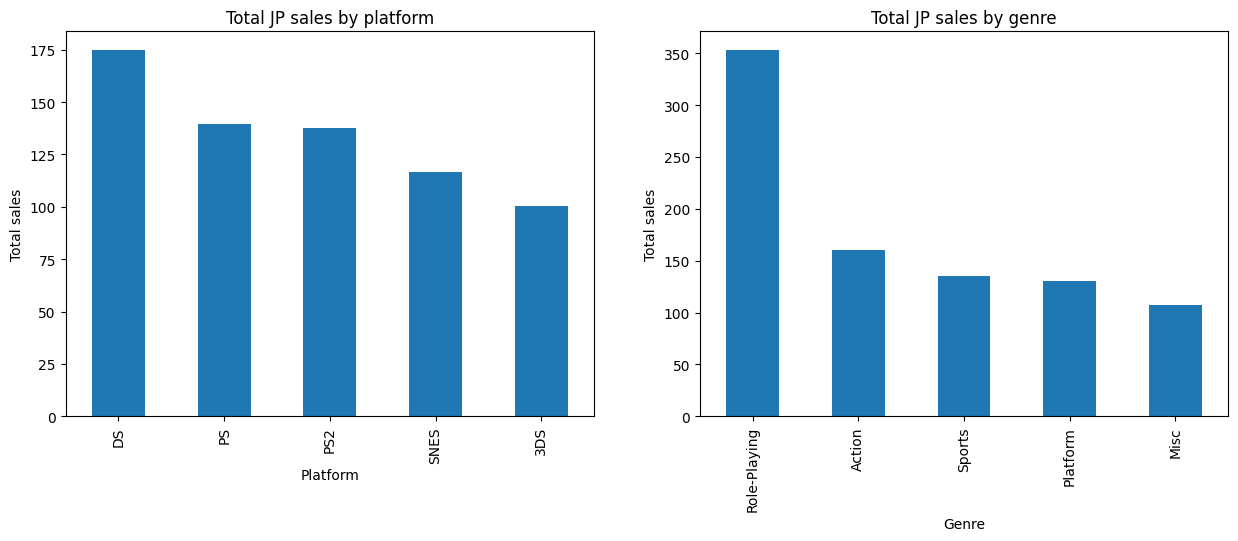

In [28]:
# Sum jp_sales by platform
jp_platforms = games.groupby('platform')['jp_sales'].sum()
jp_platforms = jp_platforms.sort_values(ascending=False)
print(jp_platforms.head(5))

# Sum jp_sales by genre
jp_genres = games.groupby('genre')['jp_sales'].sum()
jp_genres = jp_genres.sort_values(ascending=False)
print(jp_genres.head(5))

# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for total JP sales by platform
jp_platforms.head(5).plot(kind='bar', ax=axes[0], title='Total JP sales by platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total sales')

# Plot for total JP sales by genre
jp_genres.head(5).plot(kind='bar', ax=axes[1], title='Total JP sales by genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Total sales')

This region shows a great difference from the global landscape. Two of the top-ranked platforms in the graphic are positioned in the middle tier. Also, genre preferences deviate significantly, as role-playing games, which rank fourth globally, occupy the top genre here with more than double the sales of the second genre.

Based on all of this, we can conclude that the ESRB rating affect sales in individual regions.

## 5.- Hypothesis

In this section, we will test the following hypotheses:

The average user ratings for Xbox One and PC platforms are equal.

The average user ratings for the Action and Sports genres are different.

We used ttest_ind (Independent two-sample t-test) because we needed to compare means between two independent groups and set the significance level to 0.01 for more precision.


In [29]:
# Set the significance level
alpha = 0.01
# XboxOne vs PC
xone_scores = games[games['platform'] == 'XOne']['user_score']
pc_scores = games[games['platform'] == 'PC']['user_score']

# Conduct a T-test for platforms
platform_ttest = st.ttest_ind(xone_scores, pc_scores)
print("p value:", platform_ttest.pvalue)

# Compare p-value to alpha significance level 
if platform_ttest.pvalue < alpha: 
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")




p value: 8.502741903698328e-05
We reject the null hypothesis


We reject the null hypothesis, meaning we're 99% confident that the difference between groups (Xbox One vs. PC scores) is not due to chance.

In [30]:
# Action vs Sports
action_scores = games[games['genre'] == 'Action']['user_score']
sports_scores = games[games['genre'] == 'Sports']['user_score']

# Conduct a T-test for genres
genre_ttest = st.ttest_ind(action_scores, sports_scores)
print("p value:", genre_ttest.pvalue)

# Compare p-value to alpha significance level 
if genre_ttest.pvalue < alpha: 
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")



p value: 0.6361689296892363
We fail to reject the null hypothesis


We fail to reject the null hypothesis, meaning we don't have enough evidence to say the groups are different.

## 6.- Conclusion

**Overall, the analysis of video game data reveals several key trends and insights:** 

The video game industry experienced significant growth from the early 1990s, peaking around 2007-2009, followed by a period of consolidation. Platform lifecycles have generally increased over time, and consumer preferences vary significantly across regions.

**Key findings include:**

* **Industry Growth and Maturity:** The industry has evolved from a niche market to a mainstream form of entertainment, but has also experienced periods of consolidation.
* **Platform Lifecycles:** Platform lifespans have generally increased, but high-selling platforms tend to have longer lifecycles.
* **Regional Variations:** Consumer preferences for platforms and genres vary significantly across regions, suggesting that regional factors play a significant role in gaming trends.
* **Impact of Reviews:** User reviews can influence sales, but the magnitude of this impact may vary depending on the platform and genre.
* **Hypothesis Testing:** The analysis supported the hypothesis that user ratings for Xbox One and PC are different, but failed to reject the hypothesis that user ratings for Action and Sports genres are different.

**These findings highlight the dynamic nature of the video game industry and the importance of understanding consumer behavior to make informed business decisions.** Future research could explore the impact of emerging technologies (e.g., virtual reality, cloud gaming) on the industry, as well as the role of social media and online communities in shaping gaming trends.

